In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS=3
EPOCHS=25

In [4]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "Dataset",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE 
)

Found 4500 files belonging to 3 classes.


In [5]:
class_names=dataset.class_names
class_names

['Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_healthy']

In [6]:
len(dataset)

141

In [7]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[2 0 1 0 1 2 2 1 1 2 2 2 0 2 1 2 2 2 2 0 2 2 2 1 1 0 0 1 1 0 1 1]


In [8]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0].numpy())

[[[144. 135. 140.]
  [151. 142. 147.]
  [154. 145. 150.]
  ...
  [148. 139. 142.]
  [148. 139. 142.]
  [144. 135. 138.]]

 [[143. 134. 139.]
  [144. 135. 140.]
  [145. 136. 141.]
  ...
  [148. 139. 142.]
  [147. 138. 141.]
  [144. 135. 138.]]

 [[154. 145. 150.]
  [146. 137. 142.]
  [144. 135. 140.]
  ...
  [149. 140. 143.]
  [146. 137. 140.]
  [144. 135. 138.]]

 ...

 [[120. 108. 108.]
  [114. 102. 102.]
  [112. 100. 100.]
  ...
  [136. 122. 122.]
  [135. 121. 121.]
  [138. 124. 124.]]

 [[120. 108. 108.]
  [115. 103. 103.]
  [115. 103. 103.]
  ...
  [139. 125. 125.]
  [140. 126. 126.]
  [142. 128. 128.]]

 [[119. 107. 107.]
  [115. 103. 103.]
  [117. 105. 105.]
  ...
  [141. 127. 127.]
  [144. 130. 130.]
  [145. 131. 131.]]]


In [9]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0].shape)

(256, 256, 3)


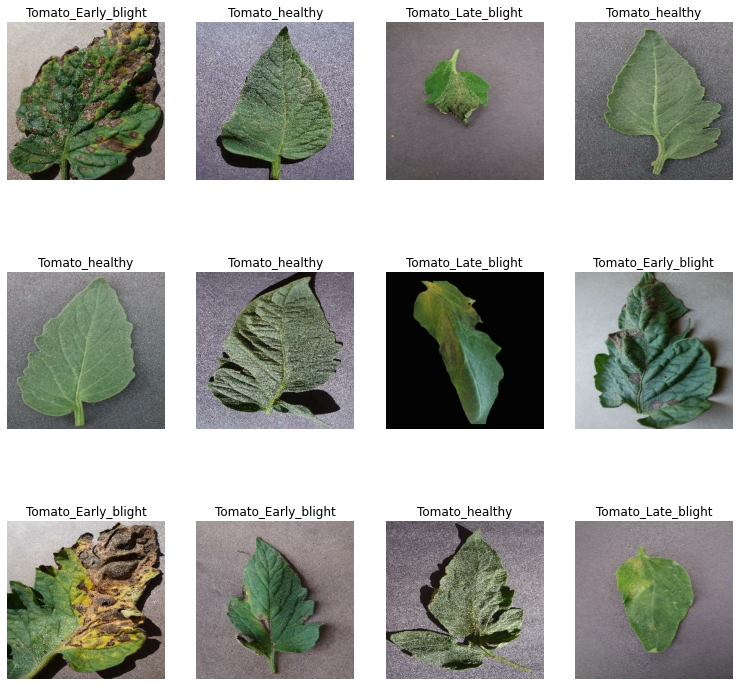

In [10]:
plt.figure(figsize=(13, 13))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [11]:
len(dataset)

141

In [12]:
train_size = 0.8
len(dataset)*train_size

112.80000000000001

In [13]:
train_ds = dataset.take(112)
len(train_ds)

112

In [14]:
test_ds = dataset.skip(112)
len(test_ds)

29

In [15]:
val_size=0.1
len(dataset)*val_size

14.100000000000001

In [16]:
val_ds = test_ds.take(14)
len(val_ds)

14

In [17]:
test_ds = test_ds.skip(14)
len(test_ds)

15

In [18]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [19]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [20]:
len(train_ds)

112

In [21]:
len(val_ds)

14

In [22]:
len(test_ds)

15

In [23]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [24]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

In [25]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [26]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 10

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [27]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (32, 60, 60, 64)         

In [28]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [29]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=EPOCHS,
)

Epoch 1/25
112/112 [==============================] - 338s 3s/step - loss: 1.0506 - accuracy: 0.4712 - val_loss: 0.7481 - val_accuracy: 0.6830
Epoch 2/25
112/112 [==============================] - 305s 3s/step - loss: 0.4474 - accuracy: 0.8231 - val_loss: 0.2836 - val_accuracy: 0.8705
Epoch 3/25
112/112 [==============================] - 307s 3s/step - loss: 0.3262 - accuracy: 0.8667 - val_loss: 0.2790 - val_accuracy: 0.8817
Epoch 4/25
112/112 [==============================] - 308s 3s/step - loss: 0.2803 - accuracy: 0.8827 - val_loss: 0.3606 - val_accuracy: 0.8594
Epoch 5/25
112/112 [==============================] - 305s 3s/step - loss: 0.2545 - accuracy: 0.9006 - val_loss: 0.2289 - val_accuracy: 0.9085
Epoch 6/25
112/112 [==============================] - 306s 3s/step - loss: 0.2340 - accuracy: 0.9065 - val_loss: 0.2361 - val_accuracy: 0.8817
Epoch 7/25
112/112 [==============================] - 306s 3s/step - loss: 0.1919 - accuracy: 0.9255 - val_loss: 0.1357 - val_accuracy: 0.9397

In [30]:
scores = model.evaluate(test_ds)

15/15 [==============================] - 16s 545ms/step - loss: 0.0212 - accuracy: 0.9917


In [31]:
scores


[0.02115098014473915, 0.9916666746139526]

In [32]:
history

In [33]:
history.params

{'verbose': 1, 'epochs': 25, 'steps': 112}

In [34]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [35]:
type(history.history['loss'])


list

In [36]:
len(history.history['loss'])


25

In [37]:
history.history['loss'][:5] # show loss for first 5 epochs


[1.0506253242492676,
 0.4473526179790497,
 0.326192170381546,
 0.2802530527114868,
 0.2544803023338318]

In [60]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']
print('accuracy','\n',acc,'\n')
print('val_accuracy','\n',val_acc,'\n')
print('loss','\n',loss,'\n')
print('val_loss','\n',val_loss)

accuracy 
 [0.47116461396217346, 0.8230683207511902, 0.8667412996292114, 0.8826987743377686, 0.900615930557251, 0.9064949750900269, 0.9255319237709045, 0.9230123162269592, 0.9384098649024963, 0.9470884799957275, 0.9496080875396729, 0.9596864581108093, 0.9627659320831299, 0.9554871320724487, 0.9706047177314758, 0.9767637252807617, 0.9647256731987, 0.9770436882972717, 0.9823628067970276, 0.9890817403793335, 0.9666853547096252, 0.9820828437805176, 0.9921612739562988, 0.9868420958518982, 0.9851623773574829] 

val_accuracy 
 [0.6830357313156128, 0.8705357313156128, 0.8816964030265808, 0.859375, 0.9084821343421936, 0.8816964030265808, 0.9397321343421936, 0.9441964030265808, 0.9151785969734192, 0.9330357313156128, 0.9352678656578064, 0.9308035969734192, 0.9665178656578064, 0.9575892686843872, 0.9754464030265808, 0.9821428656578064, 0.9709821343421936, 0.9709821343421936, 0.9732142686843872, 0.9799107313156128, 0.9799107313156128, 0.9799107313156128, 0.9799107313156128, 0.9642857313156128, 0.9

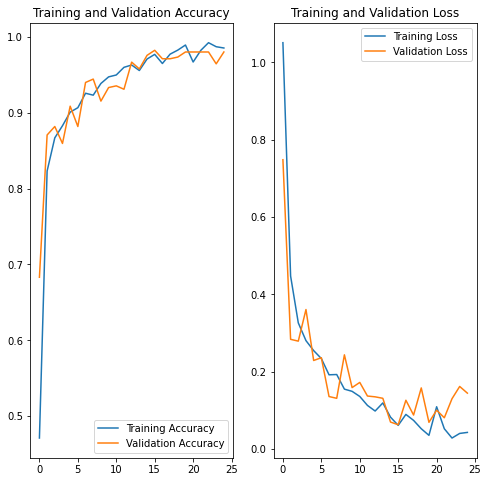

In [61]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Tomato_healthy
predicted label: Tomato_healthy


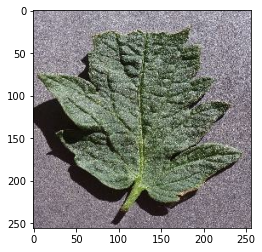

In [62]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [63]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

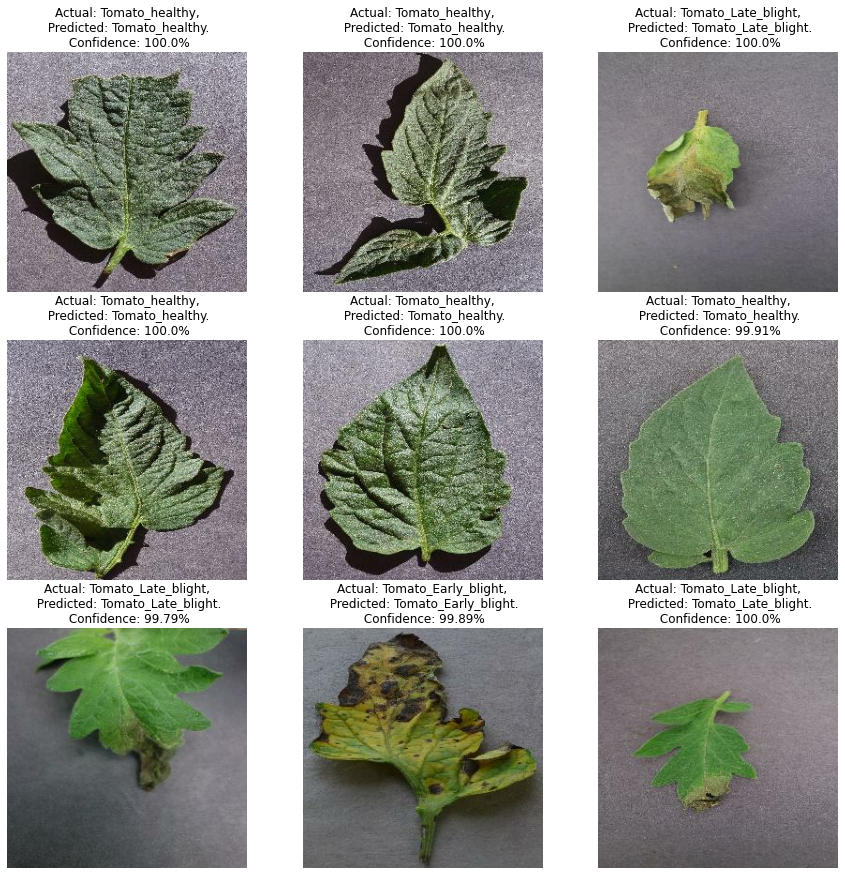

In [64]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")